# PROJECT ABOUT YEARS MOVING AVERAGE 
## Explore Weather Trends

### Gathering Data

We load the databases `results_city_data.csv` and `results_global_data.csv` in two different dataframes called `dF_city`and `df_data` respectively.

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
# We load the databases results_city_data.csv and results_global_data.csv in two different dataframes 
# called dF_cityand df_data respectively.

df_city = pd.read_csv('results_city_data.csv', sep=';')
df_global = pd.read_csv('results_global_data.csv', sep=',')

In [3]:
# Check changes
print(df_city.shape)
df_city.head()

(271, 4)


year       city country  avg_temp
0  1743  Barcelona   Spain     13.81
1  1744  Barcelona   Spain     16.98
2  1745  Barcelona   Spain     10.78
3  1746  Barcelona   Spain       NaN
4  1747  Barcelona   Spain       NaN

In [4]:
print(df_global.shape)
df_global.head()

(266, 2)


year  avg_temp
0  1750      8.72
1  1751      7.98
2  1752      5.78
3  1753      8.39
4  1754      8.47

### Assessing Data

We check if all `city`and `country`columns from `df_city` have the value Barcelona and Spain respectively.

In [5]:
df_city.city.value_counts(), df_city.country.value_counts()

(Barcelona    271
 Name: city, dtype: int64,
 Spain    271
 Name: country, dtype: int64)

> We will drop the `city`and `country`columns from `df_city` since they do not make any difference in information.

We check if the size of both dataframes are equal.

In [6]:
df_city.shape[0] - df_global.shape[0]

5

> We will drop the rows that don't match on year when we merge both dataframes.

We check datatypes

In [7]:
df_city.dtypes, df_global.dtypes

(year          int64
 city         object
 country      object
 avg_temp    float64
 dtype: object,
 year          int64
 avg_temp    float64
 dtype: object)

> We observe that te datatypes are correct.

**QUALITY ISSUES**
- Rename `year`and `avg_temp`of `df_city`to `year_bcn`and `avg_temp_bcn`, and also `year`and `avg_temp`of `df_global`to `year_global`and `avg_temp_global`.

**TIDINESS ISSUES**
- Drop the `city` and `country` columns from `df_city` since they do not make any difference in information.
- Merge `df_city`and `df_global`in a unique new dataframe.
- Remove one column of both columns related to year and rename it to year.

### Cleaning Data

Drop the `city` and `country` columns from `df_city` since they do not make any difference in information.

**Define** 

We will drop the city and country columns from df_city with drop function.

**Code**

In [8]:
# We will drop the city and country columns from df_city with drop function.
df_city = df_city.drop(['city', 'country'], axis=1)

**Test**

In [9]:
df_city.head()

year  avg_temp
0  1743     13.81
1  1744     16.98
2  1745     10.78
3  1746       NaN
4  1747       NaN

-------------------------------------------------------------------------------------------------------------------------------

Rename `year`and `avg_temp`of `df_city`to `year_bcn`and `avg_temp_bcn`, and also `year`and `avg_temp`of `df_global`to `year_global`and `avg_temp_global`.

**Define**
We rename year and avg_temp of df_city to year_bcn and avg_temp_bcn, and also year and avg_temp of df_global to year_global and avg_temp_global with rename function.

**Code**

In [10]:
df_city = df_city.rename(columns={'year':'year_bcn', 'avg_temp':'avg_temp_bcn'})
df_global = df_global.rename(columns={'year':'year_global', 'avg_temp':'avg_temp_global'})

**Test**

In [11]:
df_city.info(), df_global.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year_bcn      271 non-null    int64  
 1   avg_temp_bcn  267 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year_global      266 non-null    int64  
 1   avg_temp_global  266 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.3 KB


(None, None)

-------------------------------------------------------------------------------------------------------------------------------

Join `df_city` and `df_global` in a unique dataframe.

**Define**

We join df_city and df_global in a unique dataframe with merge function and join left in a new dataframe called df.

**Code**

In [12]:
df = df_city.merge(df_global, left_on='year_bcn', right_on='year_global')

**Test**

In [13]:
df.head()

year_bcn  avg_temp_bcn  year_global  avg_temp_global
0      1750         16.52         1750             8.72
1      1751         16.78         1751             7.98
2      1752         13.09         1752             5.78
3      1753         16.17         1753             8.39
4      1754         16.09         1754             8.47

Remove one column of both columns related to year and rename it to year.

**Define**

We remove the column year_global with drop function and we rename it to year with rename function.

**Code**

In [14]:
df_final = df.drop('year_global', axis=1)
df_final = df_final.rename(columns={'year_bcn' : 'year'})

**Test**

In [15]:
df_final.head()

year  avg_temp_bcn  avg_temp_global
0  1750         16.52             8.72
1  1751         16.78             7.98
2  1752         13.09             5.78
3  1753         16.17             8.39
4  1754         16.09             8.47

In [48]:
df_final['5_year_MA_bcn'] = df_final['avg_temp_bcn'] / 5

In [49]:
df_final.head(20)

year  avg_temp_bcn  avg_temp_global  5_year_MA_bcn
0   1750         16.52             8.72          3.304
1   1751         16.78             7.98          3.356
2   1752         13.09             5.78          2.618
3   1753         16.17             8.39          3.234
4   1754         16.09             8.47          3.218
5   1755         15.80             8.36          3.160
6   1756         16.11             8.85          3.222
7   1757         15.88             9.02          3.176
8   1758         15.04             6.74          3.008
9   1759         16.19             7.99          3.238
10  1760         15.91             7.19          3.182
11  1761         16.25             8.77          3.250
12  1762         16.13             8.61          3.226
13  1763         15.65             7.50          3.130
14  1764         16.21             8.40          3.242
15  1765         16.19             8.25          3.238
16  1766         16.06             8.41          3.212
17  1767         15.97             8.22          3.194
18  1768         15.49             6.78          3.098
19  1769         15.94             7.69          3.188

## VISUALIZATION

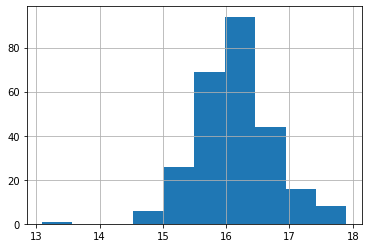

In [16]:
df_final.avg_temp_bcn.hist()

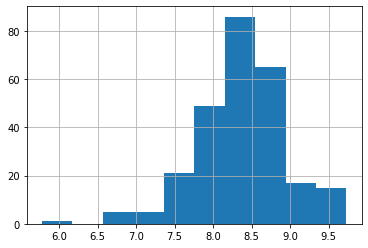

In [17]:
df_final.avg_temp_global.hist()

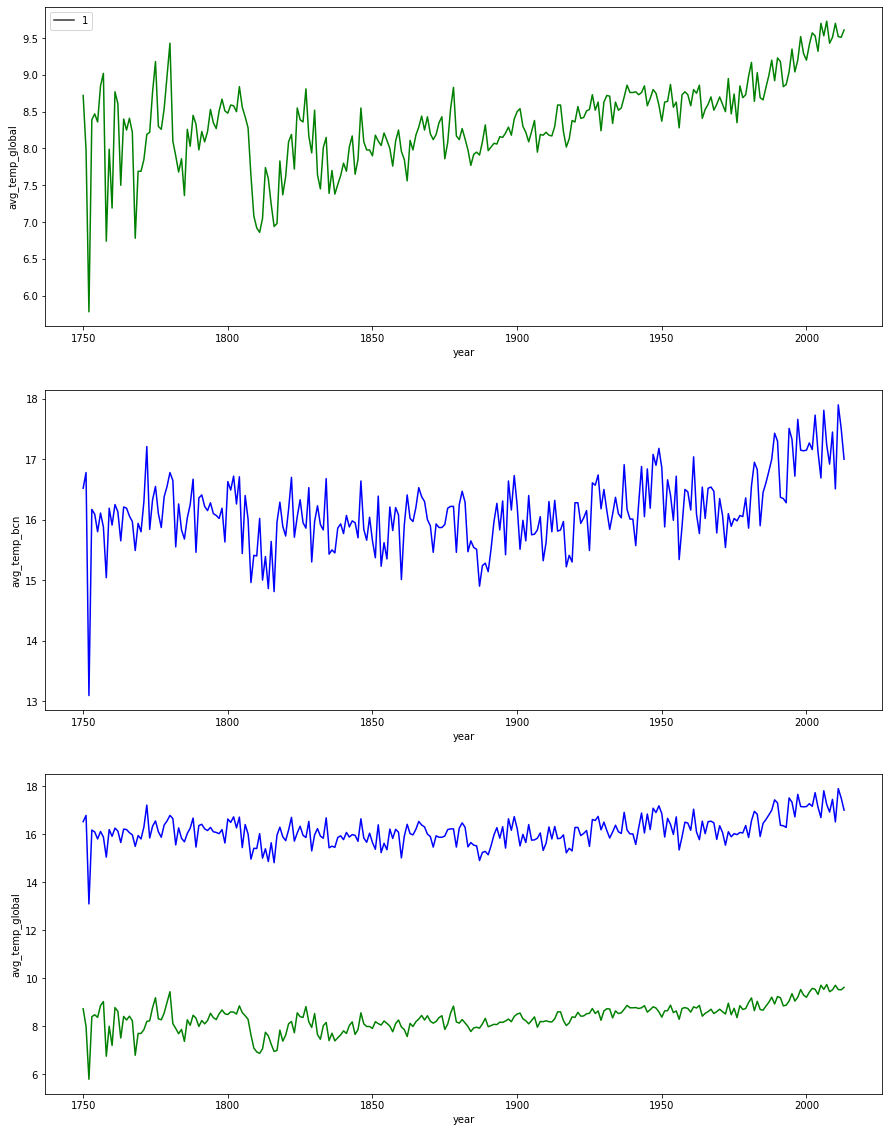

In [18]:
plt.figure(figsize=[15, 20])

plt.subplot(3, 1, 1)
sb.lineplot(data=df_final, x='year', y='avg_temp_global', color ='green', style=1, dashes=True)

plt.subplot(3, 1, 2)
sb.lineplot(data=df_final, x='year', y='avg_temp_bcn', color ='blue')

plt.subplot(3, 1, 3)
sb.lineplot(data=df_final, x='year', y='avg_temp_bcn', color ='blue')
sb.lineplot(data=df_final, x='year', y='avg_temp_global', color ='green')

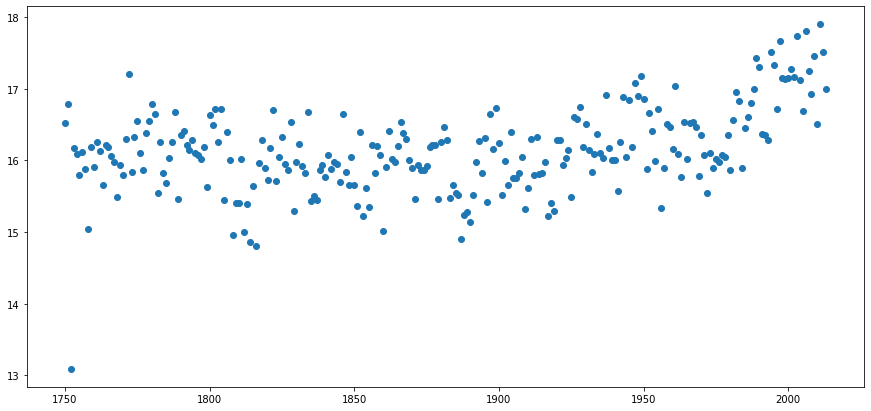

In [26]:
plt.figure(figsize=[15, 7])
plt.scatter(data=df_final, x='year', y='avg_temp_bcn')

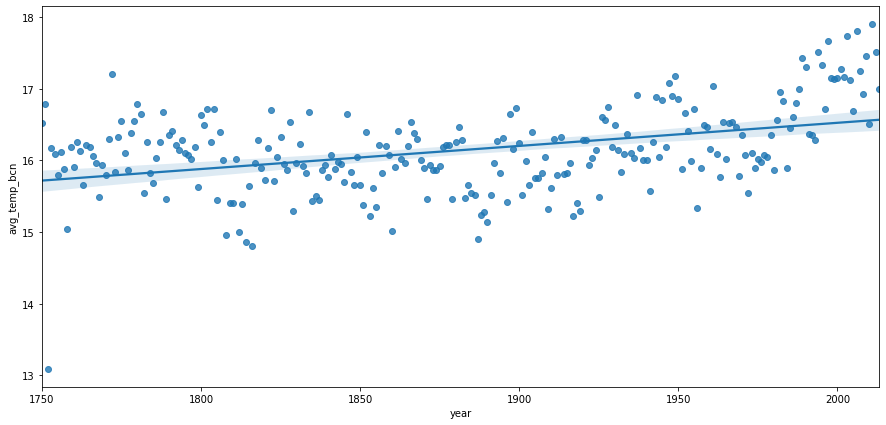

In [44]:
plt.figure(figsize=[15, 7])
sb.regplot(data = df_final, x = 'year', y = 'avg_temp_bcn')

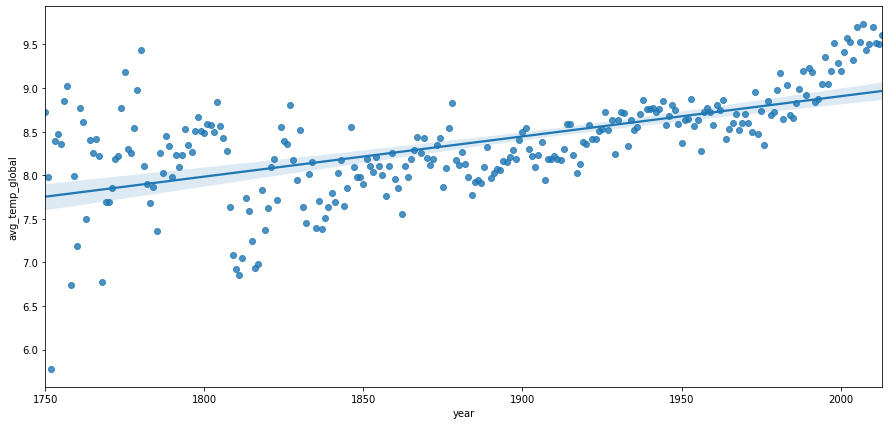

In [45]:
plt.figure(figsize=[15, 7])
sb.regplot(data = df_final, x = 'year', y = 'avg_temp_global')

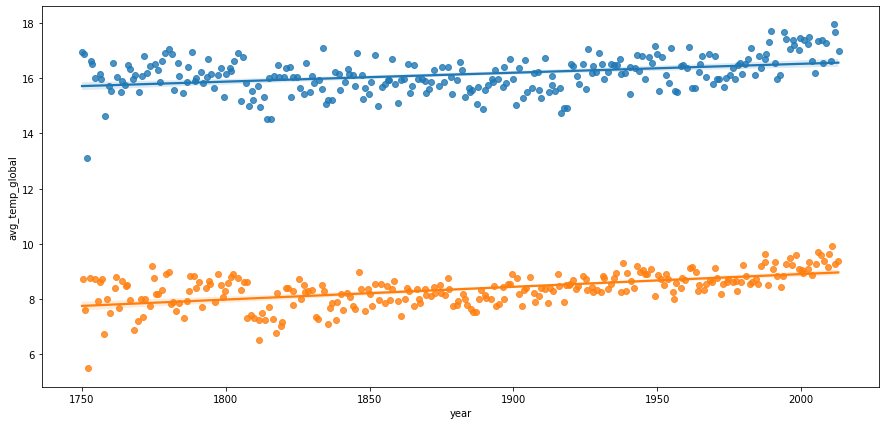

In [41]:
plt.figure(figsize=[15, 7])
sb.regplot(data = df_final, x = 'year', y = 'avg_temp_bcn', x_jitter = 0.5, y_jitter = 0.5)
sb.regplot(data = df_final, x = 'year', y = 'avg_temp_global', x_jitter = 0.5, y_jitter = 0.5)